### https://github.com/dn23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_churn= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Data Exploration

In [3]:
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data_churn=data_churn.replace(' ',np.nan) #replacing space to nan
data_churn['TotalCharges']=pd.to_numeric(data_churn['TotalCharges']) #converting totalcharges from object to numeric

In [6]:
# dropping nans
data_churn=data_churn.dropna()
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [7]:
data_churn['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [8]:
data_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [9]:
data_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [10]:
data_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

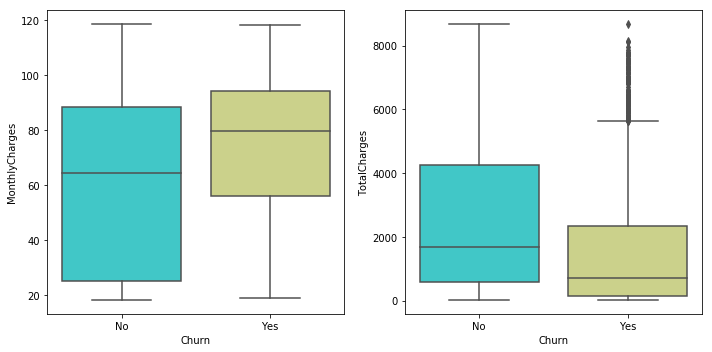

In [11]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=data_churn,x='Churn',y='MonthlyCharges',palette='rainbow',ax=axes[0])
sns.boxplot(data=data_churn,x='Churn',y='TotalCharges',palette='rainbow',ax=axes[1])
plt.tight_layout()

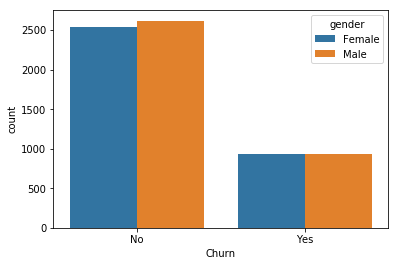

In [12]:
sns.countplot(data=data_churn,x='Churn',hue='gender')

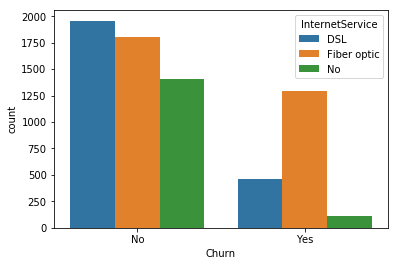

In [13]:
sns.countplot(data=data_churn,x='Churn',hue='InternetService')

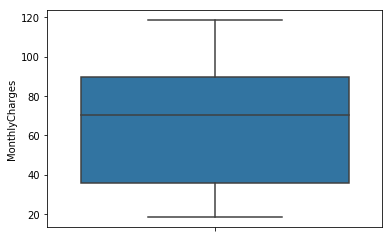

In [14]:
sns.boxplot(data=data_churn,y='MonthlyCharges')

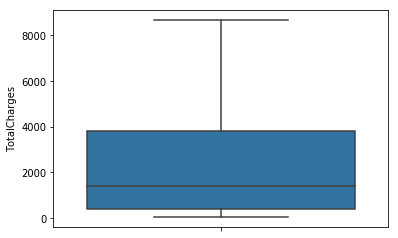

In [15]:
sns.boxplot(data=data_churn,y='TotalCharges')

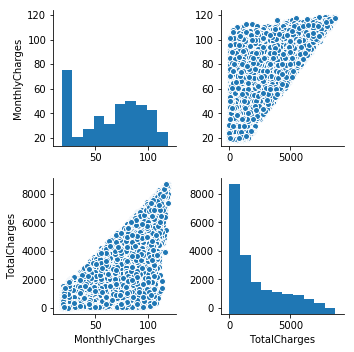

In [16]:
sns.pairplot(data=data_churn[['MonthlyCharges','TotalCharges']])

In [17]:
#creating dummy variables for all categorical variables
data_churn=data_churn.drop(['customerID'],axis=1)
dummy=pd.DataFrame()
cols=[]
for col in data_churn.columns :
    if data_churn[col].dtypes =='object' :
        dummy=pd.concat([dummy,pd.get_dummies(data_churn[col],drop_first=True,prefix=col)],axis=1)
        cols.append(col)
        
        

In [18]:
data_churn=pd.concat([data_churn,dummy],axis=1)
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
gender                                   7032 non-null object
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null object
Dependents                               7032 non-null object
tenure                                   7032 non-null int64
PhoneService                             7032 non-null object
MultipleLines                            7032 non-null object
InternetService                          7032 non-null object
OnlineSecurity                           7032 non-null object
OnlineBackup                             7032 non-null object
DeviceProtection                         7032 non-null object
TechSupport                              7032 non-null object
StreamingTV                              7032 non-null object
StreamingMovies                          7032 non-null object
Contract                   

In [19]:
data_churn=data_churn.reset_index(drop=True)

In [20]:
data_churn=data_churn.drop(cols,axis=1)

In [21]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service   

### Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
X=data_churn.drop(['Churn_Yes'],axis=1)
y=data_churn['Churn_Yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.803651029505
Test score :  0.802671262387


In [24]:
#Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1700
          1       0.66      0.54      0.60       621

avg / total       0.79      0.80      0.80      2321



In [25]:
# After Normalizing the data
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
lm=LogisticRegression()
lm.fit(X_train_scaled,y_train)
y_predicted=lm.predict(X_test_scaled)
print("Train score : ",lm.score(X_train_scaled,y_train))
print("Test score : ", lm.score(X_test_scaled,y_test))

Train score :  0.76098492889
Test score :  0.761740629039


In [26]:
#After Min Max Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
lm=LogisticRegression()
lm.fit(X_train_scaled,y_train)
y_predicted=lm.predict(X_test_scaled)
print("Train score : ",lm.score(X_train_scaled,y_train))
print("Test score : ", lm.score(X_test_scaled,y_test))

Train score :  0.806622797707
Test score :  0.800517018526


In [27]:
#Log transformations to Monthly and total charges as it was skewed
data_churn['Monthly_log']=np.log(data_churn['MonthlyCharges'])
data_churn['Total_log']=np.log(data_churn['TotalCharges'])

In [28]:
from sklearn.model_selection import train_test_split
X=data_churn.drop(['Churn_Yes','MonthlyCharges','TotalCharges'],axis=1)
y=data_churn['Churn_Yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [29]:
from sklearn.model_selection import train_test_split
X=data_churn.drop(['Churn_Yes'],axis=1)
y=data_churn['Churn_Yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
print("Train score : ",lm.score(X_train,y_train))
print("Test score : ", lm.score(X_test,y_test))

Train score :  0.807259605179
Test score :  0.803532959931


In [30]:
#Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1700
          1       0.68      0.51      0.58       621

avg / total       0.79      0.80      0.79      2321



In [31]:
#log transform with min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
lm=LogisticRegression()
lm.fit(X_train_scaled,y_train)
y_predicted=lm.predict(X_test_scaled)
print("Train score : ",lm.score(X_train_scaled,y_train))
print("Test score : ", lm.score(X_test_scaled,y_test))

Train score :  0.810019104224
Test score :  0.806979750108


In [32]:
#Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1700
          1       0.68      0.53      0.60       621

avg / total       0.80      0.81      0.80      2321



### Report 
### Explored the data and converted categorical variables to numeric.
### Ran logistic Regression on the data to get accuracy of 80%. Scaling the data  didn't improve the model.
### Log transforming the monthly charges and total charges column along with min max scaling increased the accuracy to 80.7%